In [1]:
import sys
import time

from src.efficentnet_train import data_loader, data_preprocessing
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from src.efficentfacenet import face_descriptor
from torchvision import transforms



In [2]:

dataset_path = "../dataset/preprocessed/lfw_prep"

In [13]:
# imgs_dict = data_loader.get_imgs_dict(dataset_path)

 100.0 % of the folders processed img dict loaded in 0.78 m


In [14]:
len(imgs_dict)

12646

In [15]:
train_data_loader = data_loader.data_generator(32, imgs_dict, dataset_path)

In [6]:
a, p, n = next(train_data_loader)

In [7]:
a.shape

(32, 160, 160, 3)

In [16]:
# for i in range(30):
#     _,ax=plt.subplots(1,3)
#     ax[0].set_title("Anchor")
#     ax[0].imshow(a[i])
#
#     ax[1].set_title("Positive")
#     ax[1].imshow(p[i])
#
#     ax[2].set_title("Negative")
#     ax[2].imshow(n[i])

In [3]:
model = face_descriptor.FaceDescriptorModel(download_weights=True, version="efficientnet_b1")
trans = transforms.Compose([transforms.ToTensor(), transforms.Resize((240, 240)), data_loader.Normalize()])

In [5]:
dataset = data_loader.FacesDataset(dataset_path, 1024, trans)

In [6]:
from torch import optim
from torch.nn import TripletMarginLoss
import time

epochs = 5
batch_size = 16
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = TripletMarginLoss()
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
data_size = float(len(train_loader.dataset))

In [14]:
print()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


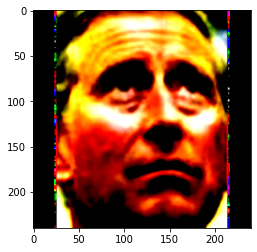

In [24]:
a, p, n = next(iter(train_loader))

a = a[0].numpy().transpose([1,2,0])
plt.imshow(a)

In [ ]:
for p in model.parameters():
    p.requires_grad = True

In [ ]:
for e in range(epochs):
    loss_sum = 0.0
    ts = time.time()
    for anchor_img, positive_img, negative_img in train_loader:
        optimizer.zero_grad()
        anchor_img.requires_grad = True
        positive_img.requires_grad = True
        negative_img.requires_grad = True

        anchor_vector = model(anchor_img)
        positive_vector = model(positive_img)
        negative_vector = model(negative_img)

        loss = loss_function(anchor_img, positive_img, negative_img)
        loss.backward()

        loss_sum += loss.item() * batch_size
        optimizer.step()
    te = time.time()
    sys.stdout.flush()
    sys.stdout.write("\r loss=" + str(loss_sum / data_size) + " time for one epoch= " + str((te - ts) / 60.0)[0:4])

In [ ]:
print()

In [14]:
model.classifier.requires_grad_()

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=128, bias=True)
)

numpy
(160, 160, 3)
uint8


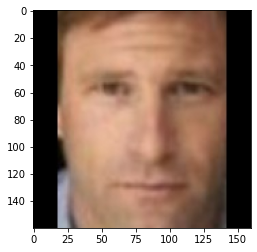

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129.41203125  95.37003906  76.56304687]
[79.46359767 60.80549022 50.93684441]


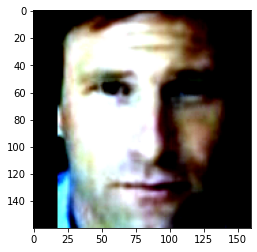

torch.Size([160, 160, 3])
tensor([129.4120,  95.3700,  76.5630])
tensor([79.4651, 60.8067, 50.9378])


In [5]:
from PIL import Image
import numpy as np
import torch

img = Image.open("C:\\graduation_project\\efficient-facenet\\dataset\\preprocessed\\lfw_prep\\Aaron_Eckhart\\0.jpg")
np_img = np.asarray(img)
print("numpy")
print(np_img.shape)
print(np_img.dtype)
plt.imshow(np_img)
plt.show()
np_mean=np_img.mean(axis=(0, 1))
print(np_mean)
np_std=np_img.std(axis=(0, 1))
print(np_std)
normalized_np_img=(np_img-np_mean)/np_std
plt.imshow(normalized_np_img.astype(float))
plt.show()
t_img = torch.tensor(np_img,dtype=torch.float)
print(t_img.shape)
t_mean = torch.mean(t_img, dim=[0, 1])
print(t_mean)
t_std = torch.std(t_img, dim=[0, 1])
print(t_std)


In [7]:
t_mean = torch.mean(t_img, dim=[0, 1])
t_std=torch.std(t_img, dim=[0, 1])

t_img=trans(np_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


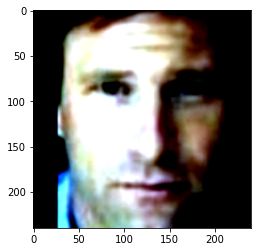

In [9]:
plt.imshow(t_img.numpy().transpose([1,2,0]))

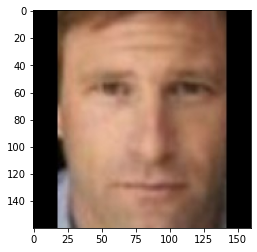

In [10]:
# t_img=trans(np_img)
to_tensor=transforms.ToTensor()
py_img=to_tensor(np_img)
plt.imshow(py_img.numpy().transpose([1,2,0]))

In [12]:
py_img.shape

torch.Size([3, 160, 160])

In [24]:
p_mean = torch.mean(py_img, dim=[1, 2])
p_std=torch.std(py_img, dim=[1, 2])

In [25]:
print(p_mean)

tensor([0.5075, 0.3740, 0.3002], dtype=torch.float64)


In [ ]:
import torchvision.transforms.functional as F
F.to_tensor()